In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from pandas import Series, DataFrame
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import patsy
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import learning_curve, RandomizedSearchCV, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [2]:
df=pd.read_csv("zingat_house_price_prediction.csv",index_col=0)

In [3]:
df.head()

İLAN_ADI  \
0  Neşe Emlak'tan Karşıyaka İmbatlı'da Satılık 1+...   
1      ALBATROS 7 DE BAKIMLI TADİLATLI MANZARALI 4+1   
2  Karşıyaka Goncalar Mah Girne Bulvarı Yakını Sa...   
3  Karşıyaka Bostanlı'da Satılık Ebeveyn Banyolu ...   
4  Remax Target Ayşe Ayhandan Demirköprü de satıl...   

                       MAHALLE      FİYAT  NET  BRÜT ODA_SALON_SAYISI  \
0    İmbatlı Karşıyaka\n İzmir  2.200.000   55    65              1+1   
1  Mavişehir Karşıyaka\n İzmir  9.750.000  184   210              4+1   
2   Goncalar Karşıyaka\n İzmir  3.750.000   97   110              3+1   
3   Bostanlı Karşıyaka\n İzmir  5.950.000  120   130              3+1   
4   Şemikler Karşıyaka\n İzmir  8.700.000  145   160              4+2   

  ODA_SAYISI  
0          1  
1          4  
2          3  
3          3  
4          4

In [4]:
df.isnull().sum()

İLAN_ADI            0
MAHALLE             0
FİYAT               0
NET                 0
BRÜT                0
ODA_SALON_SAYISI    0
ODA_SAYISI          0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 852 entries, 0 to 851
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   İLAN_ADI          852 non-null    object
 1   MAHALLE           852 non-null    object
 2   FİYAT             852 non-null    object
 3   NET               852 non-null    int64 
 4   BRÜT              852 non-null    int64 
 5   ODA_SALON_SAYISI  852 non-null    object
 6   ODA_SAYISI        852 non-null    object
dtypes: int64(2), object(5)
memory usage: 53.2+ KB


In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df['MAHALLE'] = df['MAHALLE'].str.replace('Karşıyaka\n', '', regex=False)

In [9]:
df['MAHALLE'] = df['MAHALLE'].str.replace('İzmir', '', regex=False)

In [10]:
df.MAHALLE

0           İmbatlı  
1         Mavişehir  
2          Goncalar  
3          Bostanlı  
4          Şemikler  
            ...      
511         İmbatlı  
512    Bahçelievler  
513         İmbatlı  
514    Bahçelievler  
515     Fikri Altay  
Name: MAHALLE, Length: 510, dtype: object

In [11]:
df.FİYAT.unique()

array(['2.200.000', '9.750.000', '3.750.000', '5.950.000', '8.700.000',
       '8.250.000', '3.800.000', '8.635.000', '3.150.000', '2.480.000',
       '9.000.000', '23.600.000', '3.200.000', '4.425.000', '2.700.000',
       '4.200.000', '2.550.000', '3.950.000', '2.350.000', '3.050.000',
       '4.275.000', '6.550.000', '2.175.000', '8.100.000', '3.895.000',
       '4.100.000', '8.500.000', '5.750.000', '4.250.000', '4.900.000',
       '8.000.000', '5.450.000', '5.350.000', '3.250.000', '2.050.000',
       '20.000.000', '5.990.000', '2.575.000', '2.400.000', '2.750.000',
       '1.800.000', '5.250.000', '11.000.000', '11.500.000', '3.600.000',
       '2.900.000', '3.475.000', '6.100.000', '5.650.000', '8.995.000',
       '8.750.000', '7.100.000', '5.000.000', '6.850.000', '7.950.000',
       '5.600.000', '2.450.000', '4.500.000', '1.575.000', '3.500.000',
       '2.995.000', '3.100.000', '2.600.000', '3.350.000', '7.600.000',
       '3.300.000', '2.850.000', '11.100.000', '3.990.000', 

In [12]:
df.MAHALLE.unique()

array(['İmbatlı  ', 'Mavişehir  ', 'Goncalar  ', 'Bostanlı  ',
       'Şemikler  ', 'Aksoy  ', 'Bahriye Üçok  ', 'Donanmacı  ',
       'Demirköprü  ', 'İnönü  ', 'Bahçelievler  ', 'Yalı  ',
       'Örnekköy  ', 'Atakent  ', 'Alaybey  ', 'Nergiz  ', 'Tuna  ',
       'Fikri Altay  ', 'Tersane  ', 'Mustafa Kemal  ', 'Dedebaşı  ',
       'Bahariye  ', 'Zübeyde Hanım  ', 'Latife Hanım  ', 'Cumhuriyet  '],
      dtype=object)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 0 to 515
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   İLAN_ADI          510 non-null    object
 1   MAHALLE           510 non-null    object
 2   FİYAT             510 non-null    object
 3   NET               510 non-null    int64 
 4   BRÜT              510 non-null    int64 
 5   ODA_SALON_SAYISI  510 non-null    object
 6   ODA_SAYISI        510 non-null    object
dtypes: int64(2), object(5)
memory usage: 31.9+ KB


In [14]:
df.head()

İLAN_ADI      MAHALLE      FİYAT  \
0  Neşe Emlak'tan Karşıyaka İmbatlı'da Satılık 1+...    İmbatlı    2.200.000   
1      ALBATROS 7 DE BAKIMLI TADİLATLI MANZARALI 4+1  Mavişehir    9.750.000   
2  Karşıyaka Goncalar Mah Girne Bulvarı Yakını Sa...   Goncalar    3.750.000   
3  Karşıyaka Bostanlı'da Satılık Ebeveyn Banyolu ...   Bostanlı    5.950.000   
4  Remax Target Ayşe Ayhandan Demirköprü de satıl...   Şemikler    8.700.000   

   NET  BRÜT ODA_SALON_SAYISI ODA_SAYISI  
0   55    65              1+1          1  
1  184   210              4+1          4  
2   97   110              3+1          3  
3  120   130              3+1          3  
4  145   160              4+2          4

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 0 to 515
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   İLAN_ADI          510 non-null    object
 1   MAHALLE           510 non-null    object
 2   FİYAT             510 non-null    object
 3   NET               510 non-null    int64 
 4   BRÜT              510 non-null    int64 
 5   ODA_SALON_SAYISI  510 non-null    object
 6   ODA_SAYISI        510 non-null    object
dtypes: int64(2), object(5)
memory usage: 31.9+ KB


In [16]:
df.head()

İLAN_ADI      MAHALLE      FİYAT  \
0  Neşe Emlak'tan Karşıyaka İmbatlı'da Satılık 1+...    İmbatlı    2.200.000   
1      ALBATROS 7 DE BAKIMLI TADİLATLI MANZARALI 4+1  Mavişehir    9.750.000   
2  Karşıyaka Goncalar Mah Girne Bulvarı Yakını Sa...   Goncalar    3.750.000   
3  Karşıyaka Bostanlı'da Satılık Ebeveyn Banyolu ...   Bostanlı    5.950.000   
4  Remax Target Ayşe Ayhandan Demirköprü de satıl...   Şemikler    8.700.000   

   NET  BRÜT ODA_SALON_SAYISI ODA_SAYISI  
0   55    65              1+1          1  
1  184   210              4+1          4  
2   97   110              3+1          3  
3  120   130              3+1          3  
4  145   160              4+2          4

In [17]:
df.ODA_SALON_SAYISI.unique()

array(['1+1', '4+1', '3+1', '4+2', '2+1', '5+1', '8', 'Klima',
       'Merkezi Sistem (Isı Payı Ölçer)', '4', '5', '0 TL (aylık)',
       '1.500 TL (aylık)', '1+0 (Stüdyo)', '5+2', 'Evet', '6', '7+1'],
      dtype=object)

In [18]:
unwanted_values = ['Klima', 'Merkezi Sistem (Isı Payı Ölçer)','Evet','8','6','5','4','1.500 TL (aylık)','0 TL (aylık)']
unwanted_rows = df[df['ODA_SALON_SAYISI'].isin(unwanted_values)].index

In [19]:
df.drop(unwanted_rows, inplace=True)

In [20]:
df.ODA_SALON_SAYISI.unique()

array(['1+1', '4+1', '3+1', '4+2', '2+1', '5+1', '1+0 (Stüdyo)', '5+2',
       '7+1'], dtype=object)

In [21]:
df.ODA_SAYISI.unique()

array(['1', '4', '3', '2', '5', '7'], dtype=object)

In [22]:
df["FİYAT"] = df["FİYAT"].apply(lambda x : str(x).replace(".","")).astype(int)
df['FİYAT'].fillna(df['FİYAT'].mean(), inplace=True)

In [23]:
fiyat_mahalle_df = pd.get_dummies(df, columns=["MAHALLE"], dtype=int)
fiyat_mahalle_df.drop(columns="ODA_SALON_SAYISI",inplace=True)
fiyat_mahalle_df.drop(columns="İLAN_ADI", inplace=True)
fiyat_mahalle_df

FİYAT  NET  BRÜT ODA_SAYISI  MAHALLE_Aksoy    MAHALLE_Alaybey    \
0    2200000   55    65          1                0                  0   
1    9750000  184   210          4                0                  0   
2    3750000   97   110          3                0                  0   
3    5950000  120   130          3                0                  0   
4    8700000  145   160          4                0                  0   
..       ...  ...   ...        ...              ...                ...   
511  2250000   42    50          1                0                  0   
512  6000000  115   120          3                0                  0   
513  2300000   55    65          1                0                  0   
514  2700000   90   100          2                0                  0   
515  3250000   69    80          2                0                  0   

     MAHALLE_Atakent    MAHALLE_Bahariye    MAHALLE_Bahriye Üçok    \
0                    0                   0                       0   
1                    0                   0                       0   
2                    0                   0                       0   
3                    0                   0                       0   
4                    0                   0                       0   
..                 ...                 ...                     ...   
511                  0                   0                       0   
512                  0                   0                       0   
513                  0                   0                       0   
514                  0                   0                       0   
515                  0                   0                       0   

     MAHALLE_Bahçelievler    ...  MAHALLE_Mustafa Kemal    MAHALLE_Nergiz    \
0                         0  ...                        0                 0   
1                         0  ...                        0                 0   
2                         0  ...                        0                 0   
3                         0  ...                        0                 0   
4                         0  ...                        0                 0   
..                      ...  ...                      ...               ...   
511                       0  ...                        0                 0   
512                       1  ...                        0                 0   
513                       0  ...                        0                 0   
514                       1  ...                        0                 0   
515                       0  ...                        0                 0   

     MAHALLE_Tersane    MAHALLE_Tuna    MAHALLE_Yalı    \
0                    0               0               0   
1                    0               0               0   
2                    0               0               0   
3                    0               0               0   
4                    0               0               0   
..                 ...             ...             ...   
511                  0               0               0   
512                  0               0               0   
513                  0               0               0   
514                  0               0               0   
515                  0               0               0   

     MAHALLE_Zübeyde Hanım    MAHALLE_Örnekköy    MAHALLE_İmbatlı    \
0                          0                   0                  1   
1                          0                   0                  0   
2                          0                   0                  0   
3                          0                   0                  0   
4                          0                   0                  0   
..                       ...                 ...                ...   
511                        0                   0                  1   
512                        0                   0               

In [24]:
ozellik_df = fiyat_mahalle_df.iloc[:,:4]
ozellik_df

FİYAT  NET  BRÜT ODA_SAYISI
0    2200000   55    65          1
1    9750000  184   210          4
2    3750000   97   110          3
3    5950000  120   130          3
4    8700000  145   160          4
..       ...  ...   ...        ...
511  2250000   42    50          1
512  6000000  115   120          3
513  2300000   55    65          1
514  2700000   90   100          2
515  3250000   69    80          2

[488 rows x 4 columns]

Text(0.5, 1.0, 'Normalize Edilmemiş Fiyatlar')

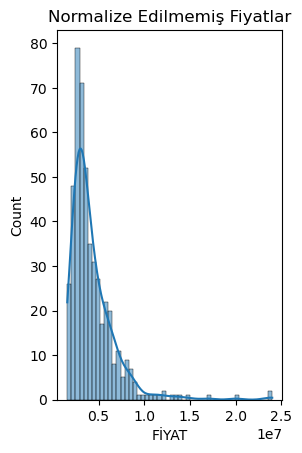

In [25]:
plt.subplot(1, 2, 1)
sns.histplot(fiyat_mahalle_df['FİYAT'], bins=50, kde=True)
plt.title('Normalize Edilmemiş Fiyatlar')

In [26]:
# FIYAT icin Z-score normalizasyonu

In [27]:
fiyatlar = fiyat_mahalle_df['FİYAT']

In [28]:
normalized_prices = (fiyatlar - fiyatlar.mean()) / fiyatlar.std()

In [29]:
fiyat_mahalle_df['FİYAT'] = normalized_prices

In [30]:
fiyat_mahalle_df

FİYAT  NET  BRÜT ODA_SAYISI  MAHALLE_Aksoy    MAHALLE_Alaybey    \
0   -0.815859   55    65          1                0                  0   
1    2.097776  184   210          4                0                  0   
2   -0.217696   97   110          3                0                  0   
3    0.631311  120   130          3                0                  0   
4    1.692569  145   160          4                0                  0   
..        ...  ...   ...        ...              ...                ...   
511 -0.796564   42    50          1                0                  0   
512  0.650606  115   120          3                0                  0   
513 -0.777268   55    65          1                0                  0   
514 -0.622903   90   100          2                0                  0   
515 -0.410652   69    80          2                0                  0   

     MAHALLE_Atakent    MAHALLE_Bahariye    MAHALLE_Bahriye Üçok    \
0                    0                   0                       0   
1                    0                   0                       0   
2                    0                   0                       0   
3                    0                   0                       0   
4                    0                   0                       0   
..                 ...                 ...                     ...   
511                  0                   0                       0   
512                  0                   0                       0   
513                  0                   0                       0   
514                  0                   0                       0   
515                  0                   0                       0   

     MAHALLE_Bahçelievler    ...  MAHALLE_Mustafa Kemal    MAHALLE_Nergiz    \
0                         0  ...                        0                 0   
1                         0  ...                        0                 0   
2                         0  ...                        0                 0   
3                         0  ...                        0                 0   
4                         0  ...                        0                 0   
..                      ...  ...                      ...               ...   
511                       0  ...                        0                 0   
512                       1  ...                        0                 0   
513                       0  ...                        0                 0   
514                       1  ...                        0                 0   
515                       0  ...                        0                 0   

     MAHALLE_Tersane    MAHALLE_Tuna    MAHALLE_Yalı    \
0                    0               0               0   
1                    0               0               0   
2                    0               0               0   
3                    0               0               0   
4                    0               0               0   
..                 ...             ...             ...   
511                  0               0               0   
512                  0               0               0   
513                  0               0               0   
514                  0               0               0   
515                  0               0               0   

     MAHALLE_Zübeyde Hanım    MAHALLE_Örnekköy    MAHALLE_İmbatlı    \
0                          0                   0                  1   
1                          0                   0                  0   
2                          0                   0                  0   
3                          0                   0                  0   
4                          0                   0                  0   
..                       ...                 ...                ...   
511                        0                   0                  1   
512                        0                   0    

Text(0.5, 1.0, 'Normalize Edilmiş Fiyatlar')

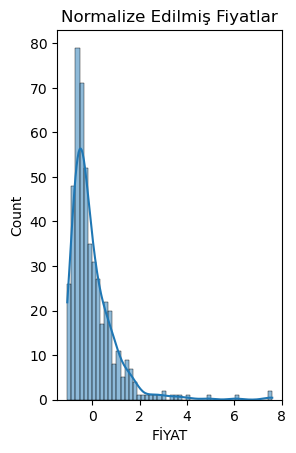

In [31]:
plt.subplot(1, 2, 2)
sns.histplot(fiyat_mahalle_df['FİYAT'], bins=50, kde=True)
plt.title('Normalize Edilmiş Fiyatlar')

In [32]:
# Exploratory Data Analysis

<Axes: title={'center': 'Karsiyaka ev fiyatlari dagilimi'}, xlabel='FİYAT', ylabel='Count'>

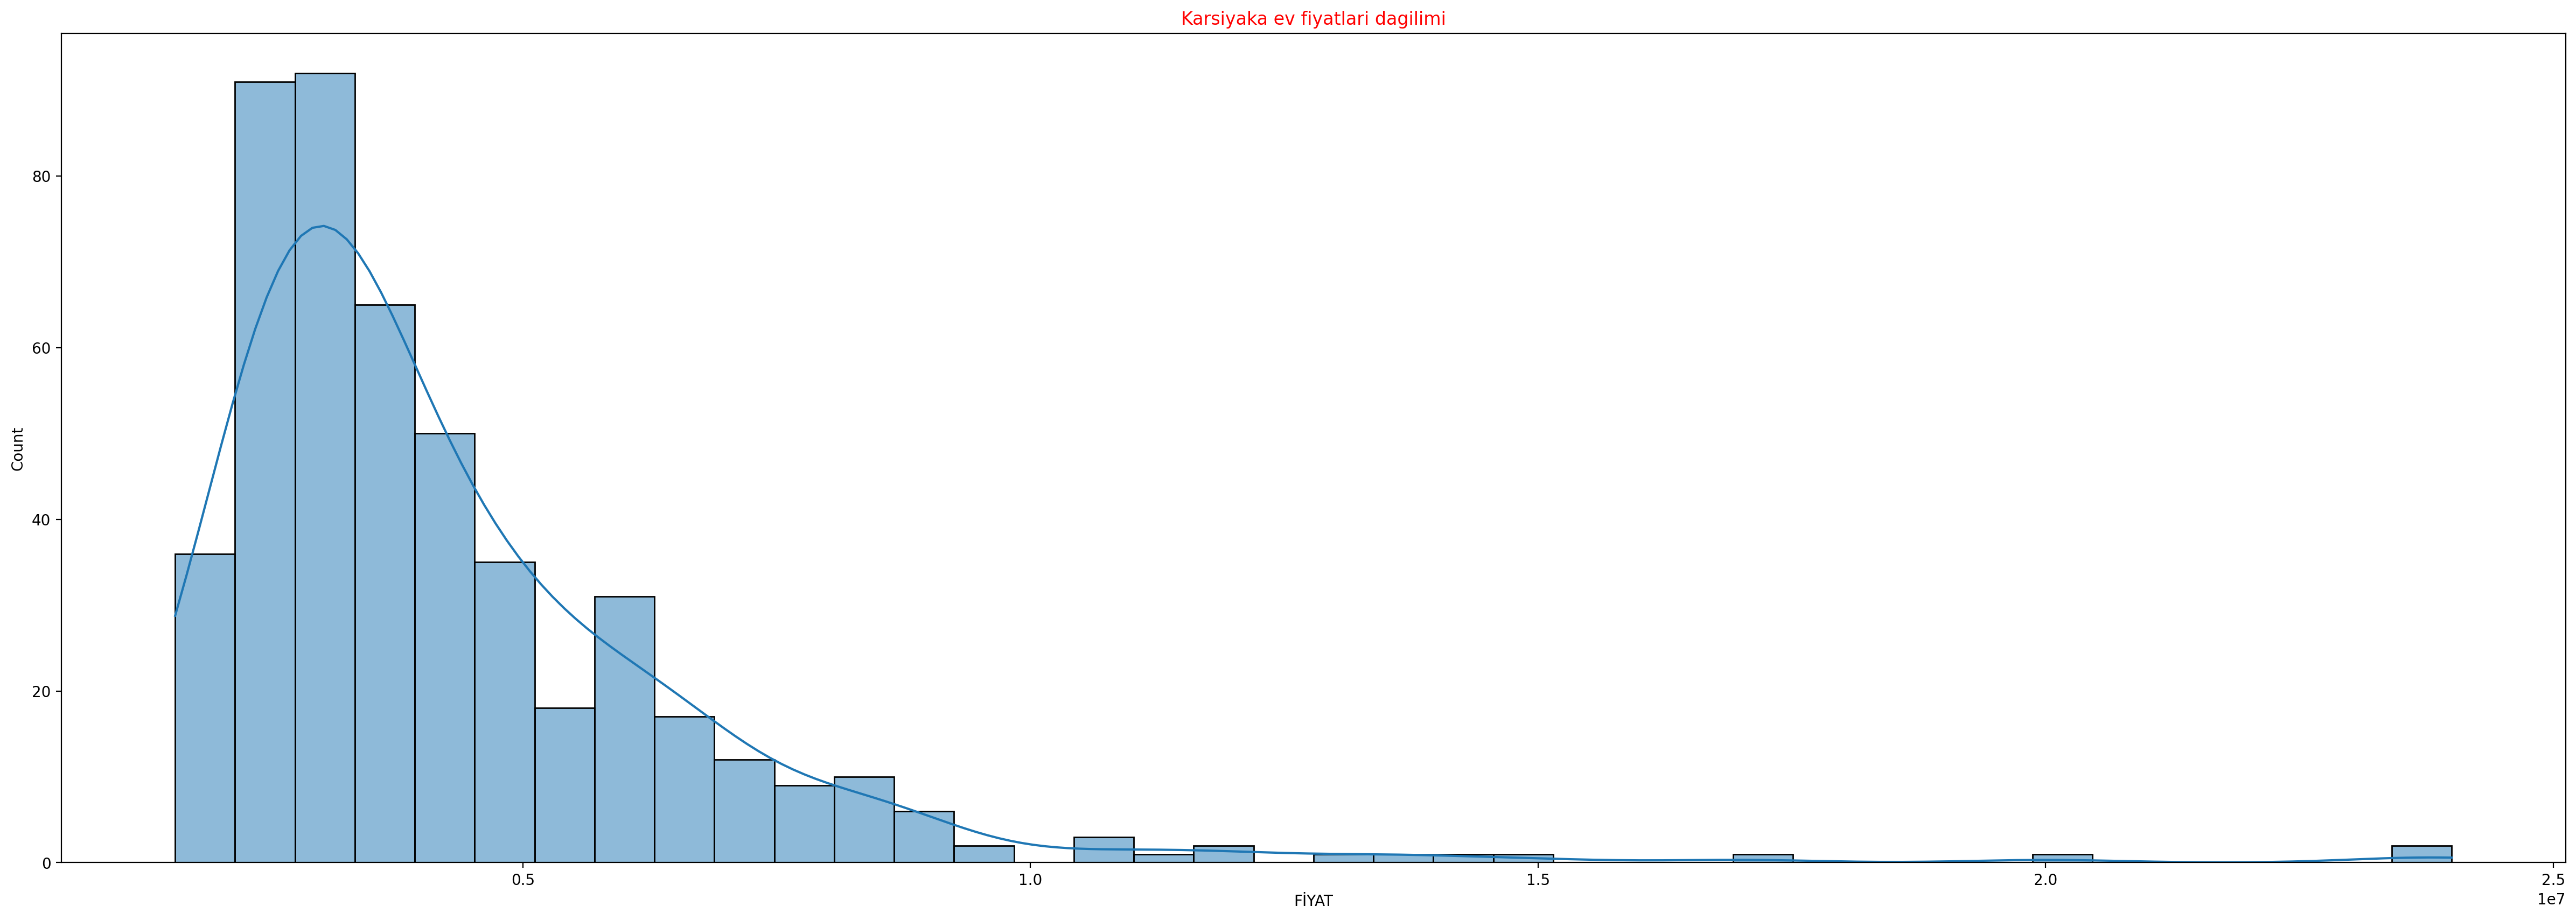

In [33]:
plt.figure(figsize=(30,10),dpi=200)
plt.title("Karsiyaka ev fiyatlari dagilimi", c="red")
sns.histplot(data=df, x="FİYAT", kde=True)

In [34]:
oda_salon = df.groupby("ODA_SALON_SAYISI").count().reset_index().iloc[:,:2]
oda_salon

ODA_SALON_SAYISI  İLAN_ADI
0     1+0 (Stüdyo)         1
1              1+1        41
2              2+1       156
3              3+1       258
4              4+1        21
5              4+2         1
6              5+1         7
7              5+2         2
8              7+1         1

Text(0, 0.5, 'İLAN SAYISI')

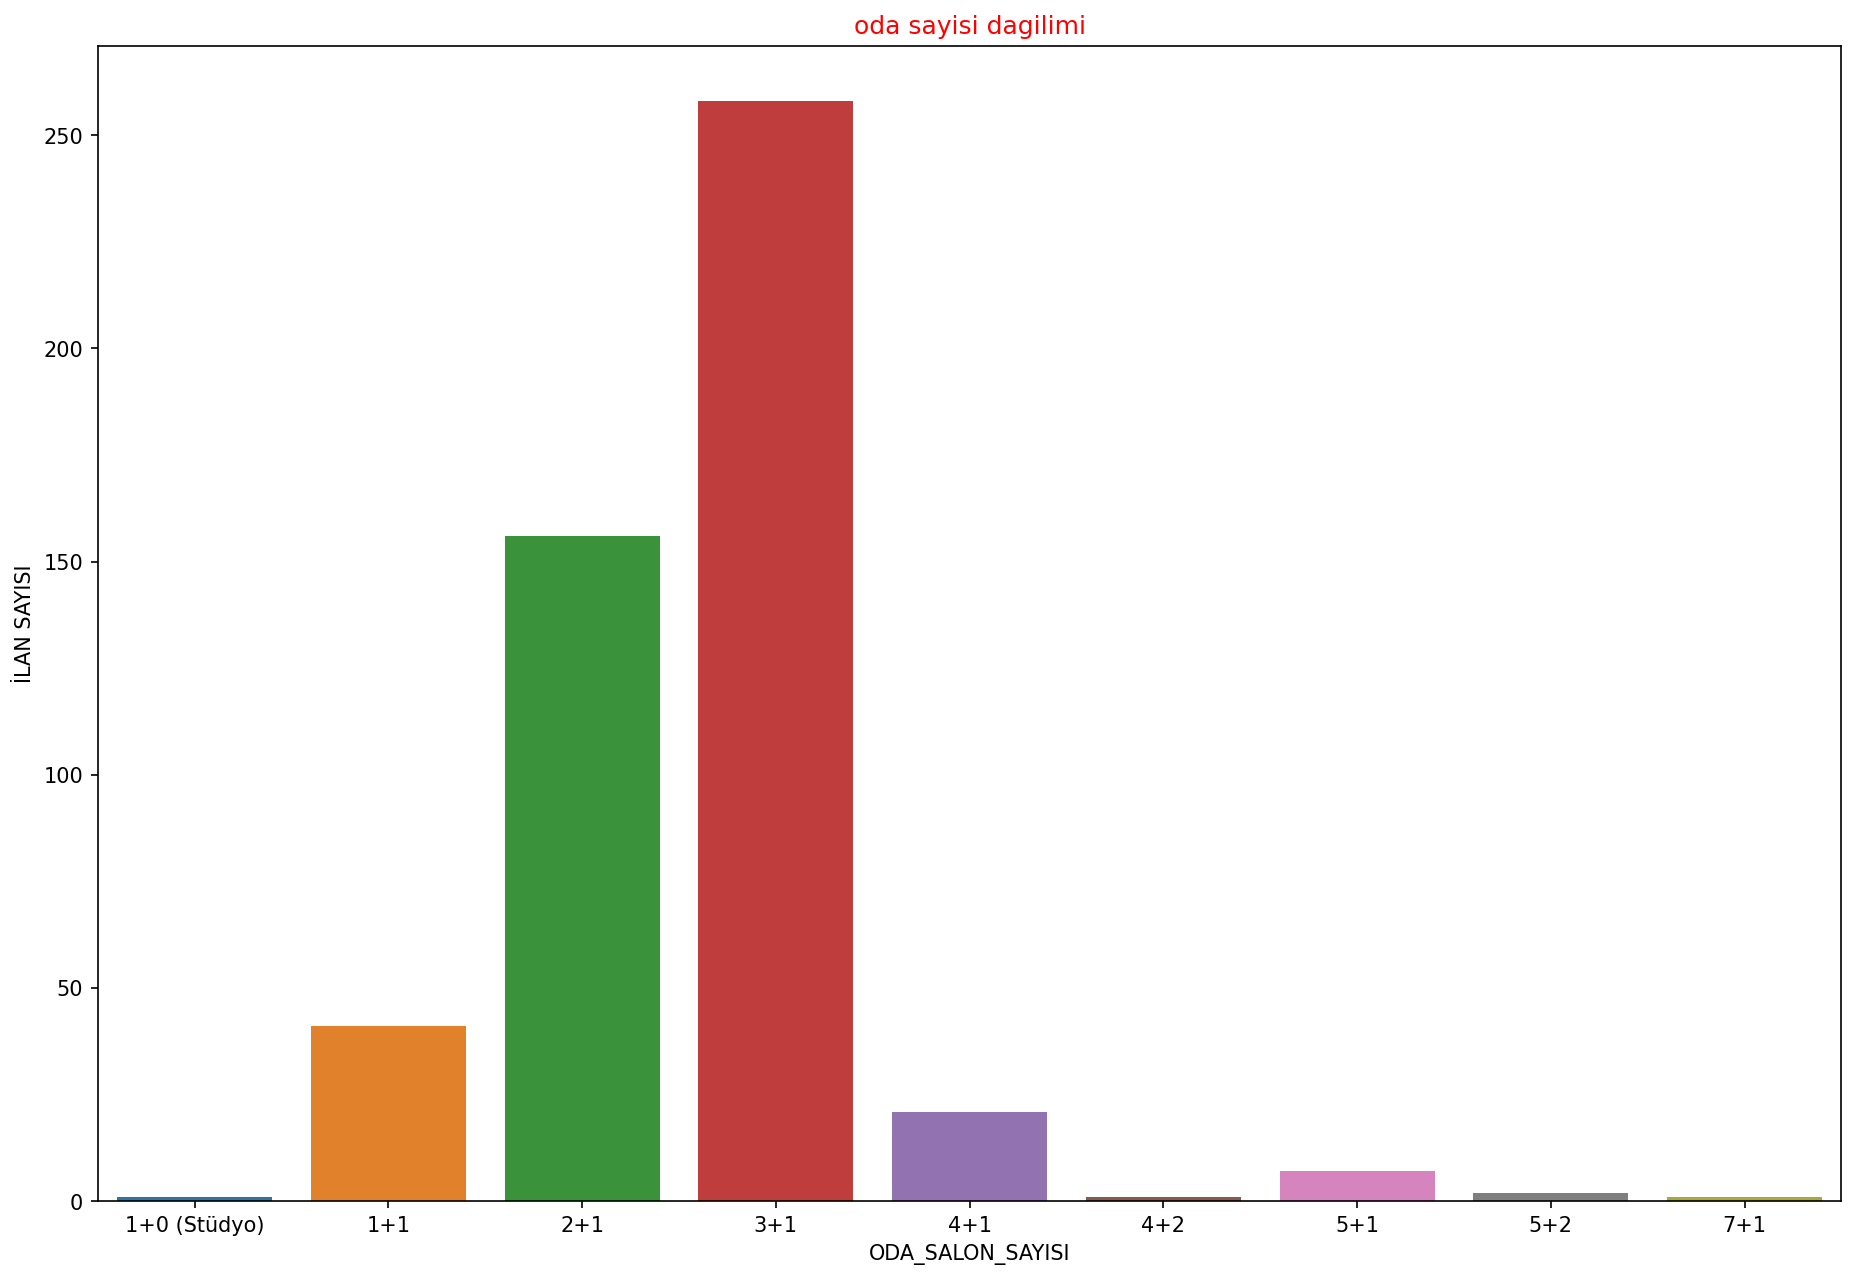

In [35]:
plt.figure(figsize=(15,10),dpi=150)
plt.title("oda sayisi dagilimi", c="red")
sns.barplot(x = 'ODA_SALON_SAYISI', y = 'İLAN_ADI', data = oda_salon)
plt.ylabel("İLAN SAYISI")

In [36]:
mahalle = df.groupby("MAHALLE").count().iloc[:,0:1].reset_index().head(10)
mahalle_sort = mahalle.sort_values("İLAN_ADI", ascending=False)
mahalle_sort

MAHALLE  İLAN_ADI
6      Bostanlı          48
5  Bahçelievler          35
0         Aksoy          31
3      Bahariye          19
4  Bahriye Üçok          19
9    Demirköprü          19
8      Dedebaşı          18
1       Alaybey          11
2       Atakent          11
7    Cumhuriyet           1

Text(0, 0.5, 'İLAN_SAYISI')

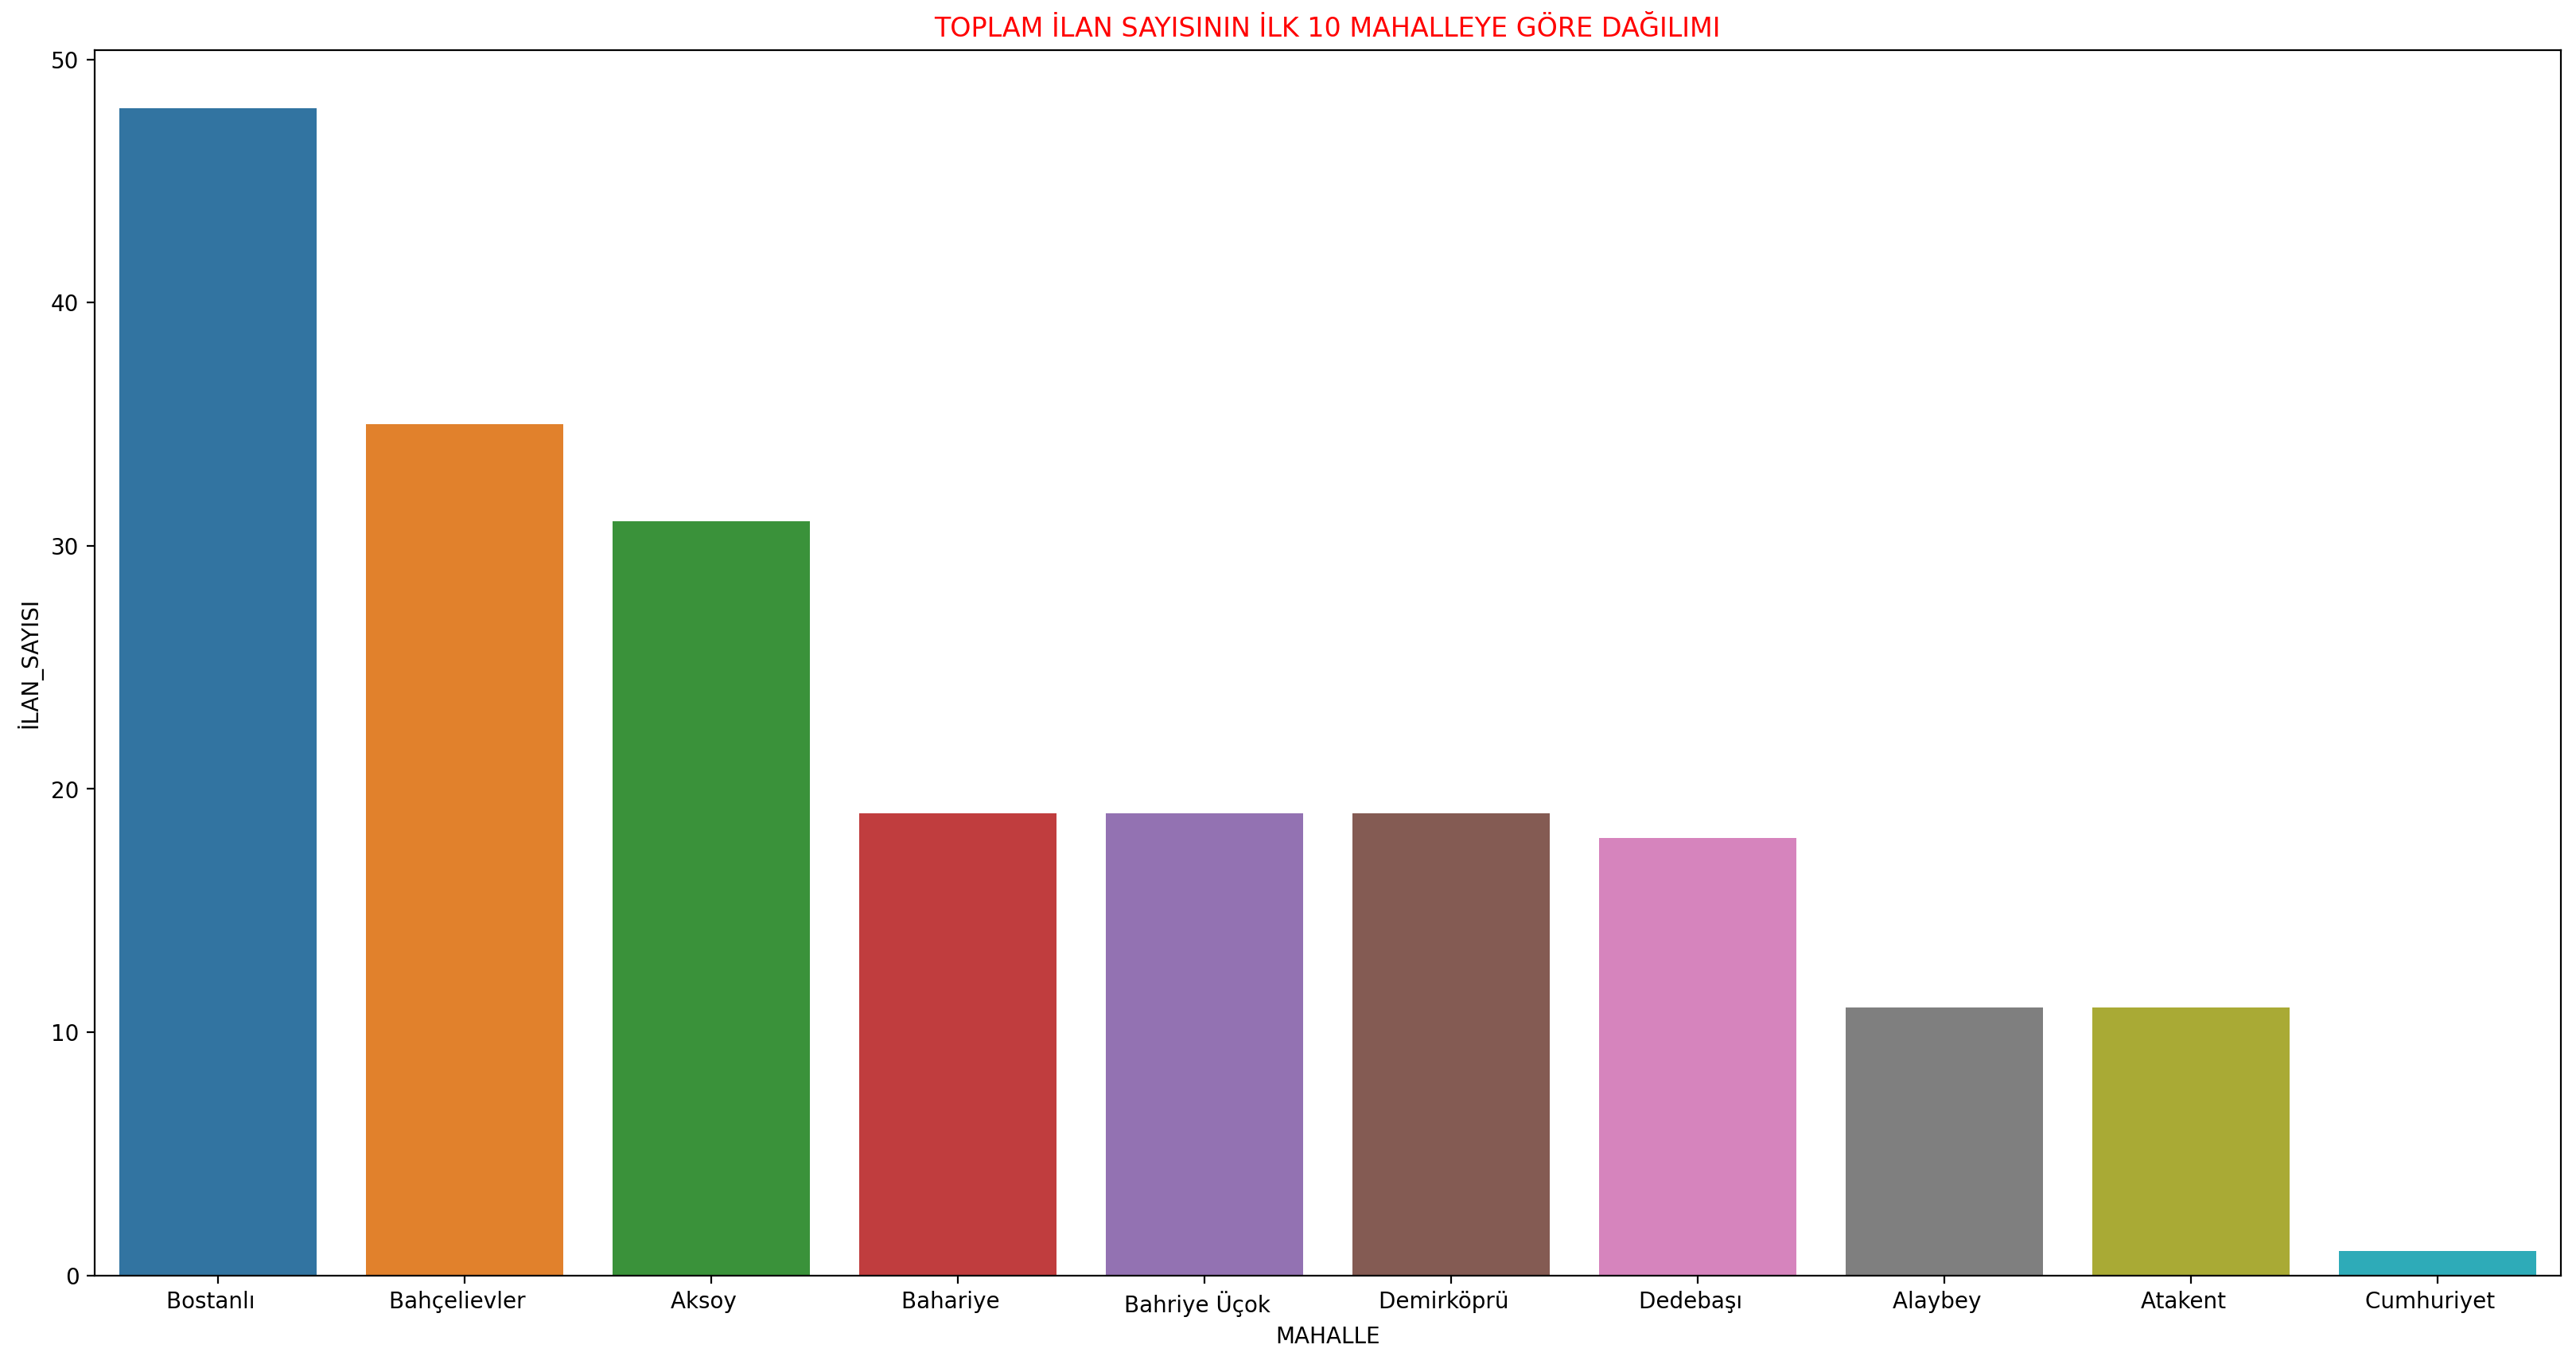

In [37]:
plt.figure(figsize=(20,10),dpi=200)
plt.title("TOPLAM İLAN SAYISININ İLK 10 MAHALLEYE GÖRE DAĞILIMI", c="red")
sns.barplot(x = 'MAHALLE', y = 'İLAN_ADI', data = mahalle_sort)
plt.ylabel("İLAN_SAYISI")

In [38]:
fiyat_mahalle_df.corr()

FİYAT       NET      BRÜT  ODA_SAYISI  \
FİYAT                    1.000000  0.544956  0.599415    0.464874   
NET                      0.544956  1.000000  0.964022    0.792615   
BRÜT                     0.599415  0.964022  1.000000    0.792261   
ODA_SAYISI               0.464874  0.792615  0.792261    1.000000   
MAHALLE_Aksoy           -0.021996  0.088042  0.073732    0.077391   
MAHALLE_Alaybey         -0.064425 -0.048445 -0.034437   -0.027000   
MAHALLE_Atakent          0.111674  0.007588  0.002934    0.024202   
MAHALLE_Bahariye        -0.081618 -0.023866 -0.022428    0.008266   
MAHALLE_Bahriye Üçok     0.028347  0.049075  0.050279    0.099943   
MAHALLE_Bahçelievler    -0.047727  0.093776  0.081098    0.138021   
MAHALLE_Bostanlı         0.090533 -0.002992 -0.020353    0.061920   
MAHALLE_Cumhuriyet       0.042641  0.055012  0.071559    0.078523   
MAHALLE_Dedebaşı        -0.076918 -0.087861 -0.098816   -0.091004   
MAHALLE_Demirköprü      -0.007571  0.084138  0.074440   -0.004831   
MAHALLE_Donanmacı       -0.062936 -0.000576 -0.002557    0.034459   
MAHALLE_Fikri Altay     -0.018366 -0.010097 -0.003814   -0.046629   
MAHALLE_Goncalar        -0.052435 -0.017570 -0.033504   -0.007254   
MAHALLE_Latife Hanım    -0.065904 -0.079067 -0.076369   -0.067250   
MAHALLE_Mavişehir        0.284276  0.083235  0.126861   -0.030002   
MAHALLE_Mustafa Kemal    0.110129  0.024159  0.022454    0.045141   
MAHALLE_Nergiz           0.017791  0.005434 -0.005060   -0.002950   
MAHALLE_Tersane          0.025729  0.015546  0.018437    0.030405   
MAHALLE_Tuna            -0.056318 -0.010947 -0.018896    0.011575   
MAHALLE_Yalı             0.178891  0.086756  0.096253    0.083758   
MAHALLE_Zübeyde Hanım   -0.075421 -0.009680 -0.025487   -0.004017   
MAHALLE_Örnekköy        -0.145353 -0.109126 -0.089527   -0.121941   
MAHALLE_İmbatlı         -0.108447 -0.166790 -0.170737   -0.194879   
MAHALLE_İnönü           -0.057153 -0.157687 -0.139471   -0.175896   
MAHALLE_Şemikler        -0.051971  0.001444 -0.000872   -0.017865   

                         MAHALLE_Aksoy    MAHALLE_Alaybey    \
FİYAT                          -0.021996          -0.064425   
NET                             0.088042          -0.048445   
BRÜT                            0.073732          -0.034437   
ODA_SAYISI                      0.077391          -0.027000   
MAHALLE_Aksoy                   1.000000          -0.039551   
MAHALLE_Alaybey                -0.039551           1.000000   
MAHALLE_Atakent                -0.039551          -0.023061   
MAHALLE_Bahariye               -0.052422          -0.030565   
MAHALLE_Bahriye Üçok           -0.052422          -0.030565   
MAHALLE_Bahçelievler           -0.072395          -0.042211   
MAHALLE_Bostanlı               -0.086023          -0.050157   
MAHALLE_Cumhuriyet             -0.011802          -0.006881   
MAHALLE_Dedebaşı               -0.050969          -0.029718   
MAHALLE_Demirköprü             -0.052422          -0.030565   
MAHALLE_Donanmacı              -0.052422          -0.030565   
MAHALLE_Fikri Altay            -0.031419          -0.018320   
MAHALLE_Goncalar               -0.035701          -0.020816   
MAHALLE_Latife Hanım           -0.023677          -0.013805   
MAHALLE_Mavişehir              -0.064257          -0.037466   
MAHALLE_Mustafa Kemal          -0.023677          -0.013805   
MAHALLE_Nergiz                 -0.041353          -0.024112   
MAHALLE_Tersane                -0.035701          -0.020816   
MAHALLE_Tuna                   -0.035701          -0.020816   
MAHALLE_Yalı                   -0.090911          -0.053007   
MAHALLE_Zübeyde Hanım          -0.031419          -0.018320   
MAHALLE_Örnekköy               -0.083009          -0.048400   
MAHALLE_İmbatlı                -0.060520          -0.035287   
MAHALLE_İnönü                  -0.026499          -0.015451   
MAHALLE_Şemikler               -0.077824          -0.045376   

                         MAHALLE_Atakent    MAHALLE_Bahariye    \


<Axes: title={'center': 'ev ozellikleri'}>

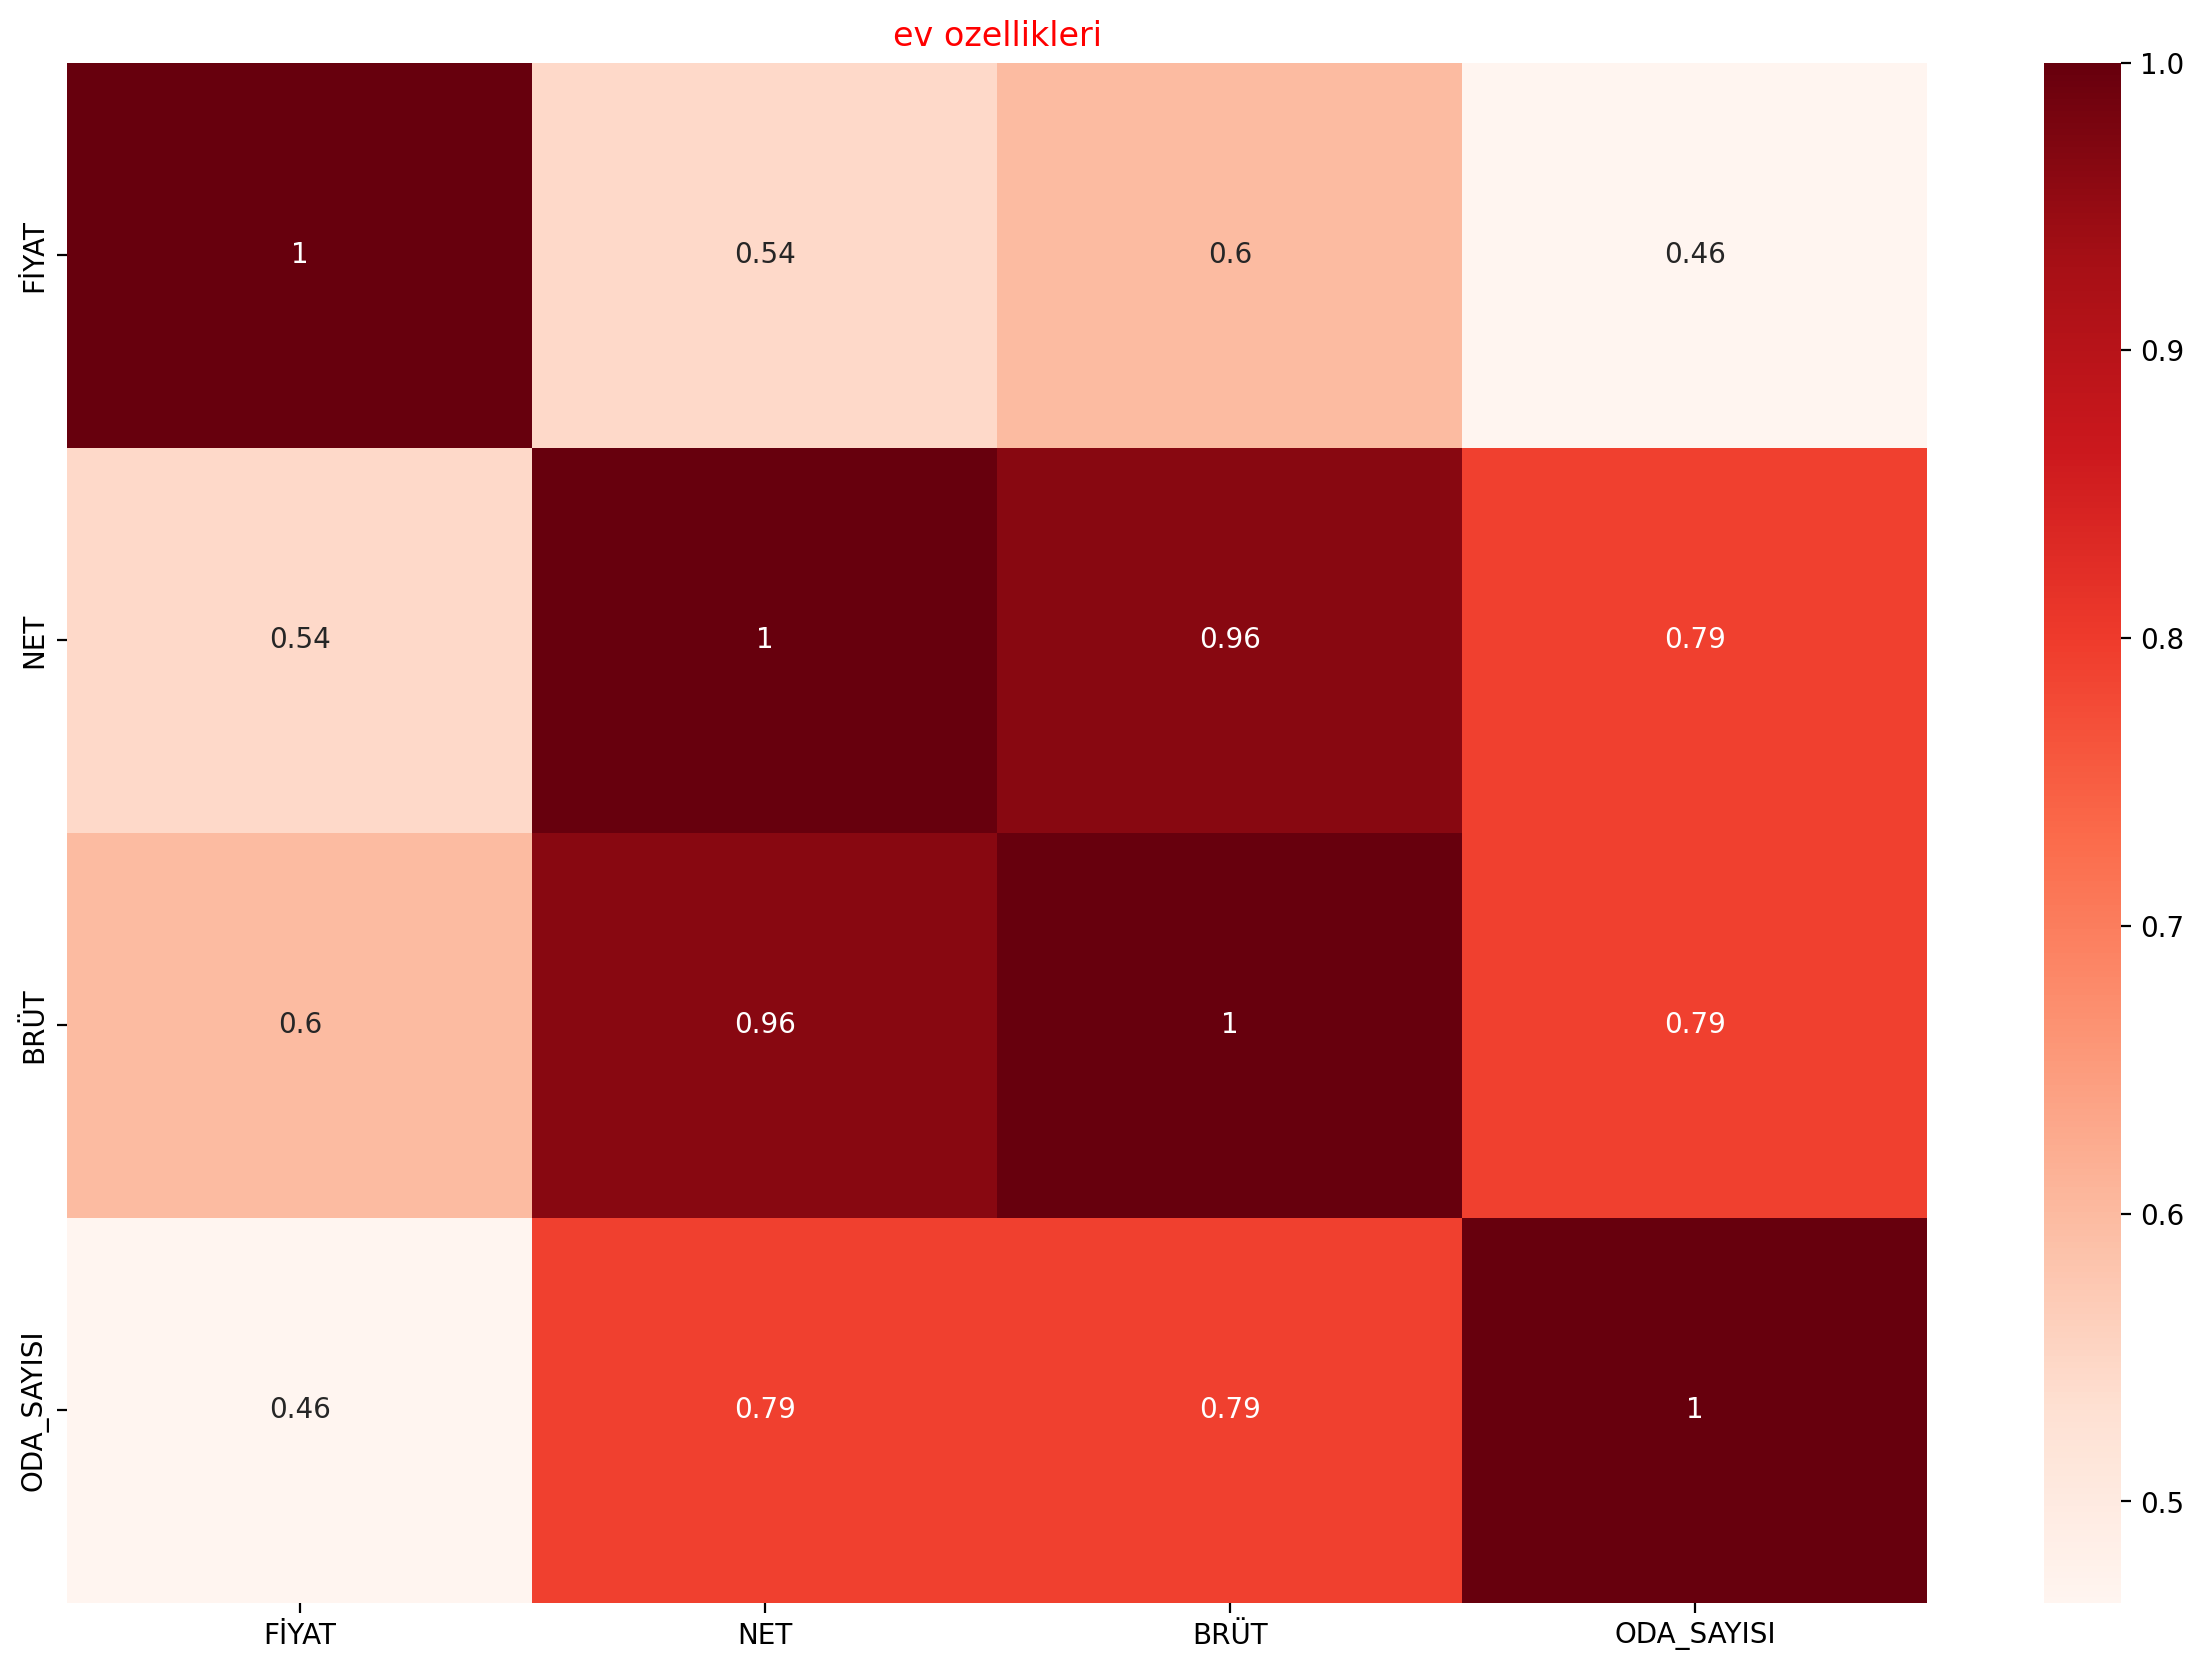

In [39]:
plt.figure(figsize=(15,10),dpi=200)
plt.title("ev ozellikleri", c="red")
sns.heatmap(ozellik_df.corr(), cmap="Reds", annot=True)

In [40]:
plt.figure(figsize=(35,30),dpi=400)
plt.title("mahalle'ye gore", c="red")
sns.heatmap(fiyat_mahalle_df.corr(), cmap="Reds", annot=True)

<Axes: title={'center': "mahalle'ye gore"}>

C:\Users\ipekk\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


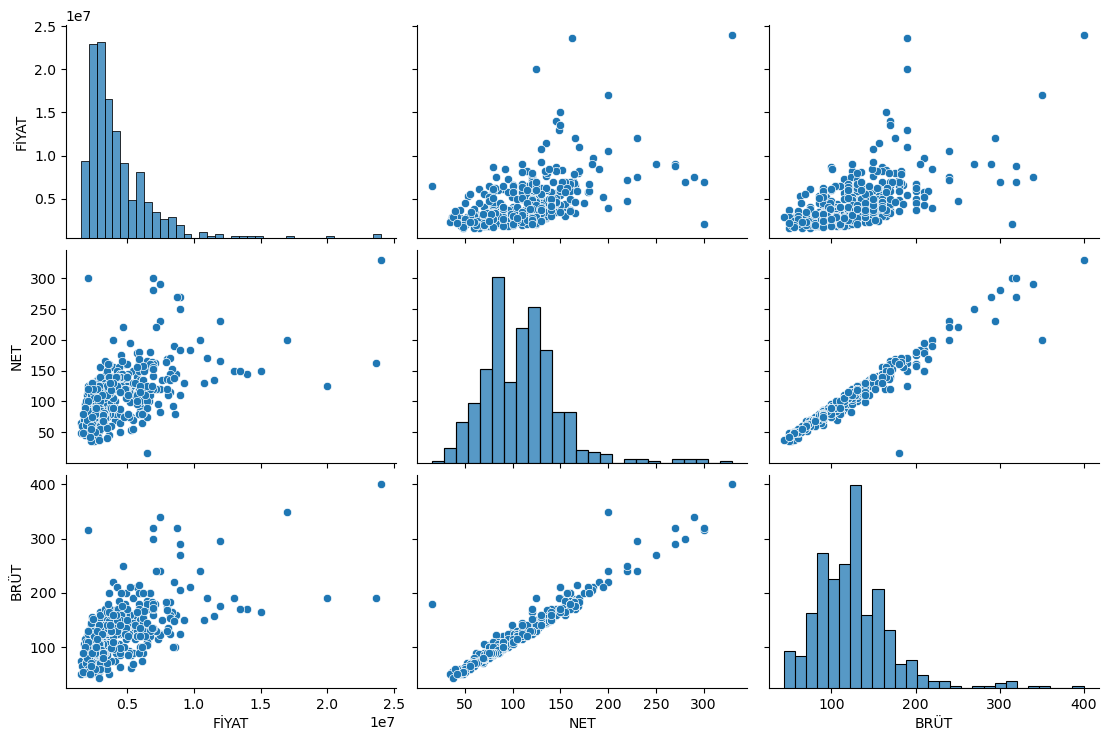

In [41]:
sns.pairplot(ozellik_df, aspect=1.5)

In [42]:
X = fiyat_mahalle_df.drop(['FİYAT'], axis=1)
Y = fiyat_mahalle_df['FİYAT']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=3)
print('x_train :', x_train.shape)
print('x_test :', x_test.shape)
print('y_train :', y_train.shape)
print('y_test :', y_test.shape)

x_train : (341, 28)
x_test : (147, 28)
y_train : (341,)
y_test : (147,)


In [43]:
# Lineer Regresyon
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)
y_pred_linear = linear_reg.predict(x_test)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
print('RMSE (Linear Regression):', rmse_linear)


RMSE (Linear Regression): 0.7550750682202364


In [44]:
# Decision Tree – Regression
dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train, y_train)
y_pred_dt = dt_reg.predict(x_test)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print('RMSE (Decision Tree Regression):', rmse_dt)


RMSE (Decision Tree Regression): 1.103589453063141


In [45]:
# Random Forest
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)
y_pred_rf = rf_reg.predict(x_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print('RMSE (Random Forest Regression):', rmse_rf)


RMSE (Random Forest Regression): 0.7120832386932435


In [46]:
#Support Vector Regression
svr_reg = SVR()
svr_reg.fit(x_train, y_train.values.ravel())
y_pred_svr = svr_reg.predict(x_test)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
print('RMSE (Support Vector Regression):', rmse_svr)


RMSE (Support Vector Regression): 0.6833717436399328


In [47]:
# K - Nearest Neighbors
knn_reg = KNeighborsRegressor()
knn_reg.fit(x_train, y_train.values.ravel())
y_pred_knn = knn_reg.predict(x_test)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
print('RMSE (K-Nearest Neighbors Regression):', rmse_knn)

RMSE (K-Nearest Neighbors Regression): 0.740485726043525


In [48]:
# Lasso
lasso_reg = Lasso(alpha=0.1)  # alpha, düzenleme parametresidir, değeri değiştirilebilir
lasso_reg.fit(x_train, y_train)
y_pred_lasso = lasso_reg.predict(x_test)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print('RMSE (Lasso Regression):', rmse_lasso)

RMSE (Lasso Regression): 0.703110240302773


In [49]:
# Ridge
ridge_reg = Ridge()
ridge_reg.fit(x_train, y_train)
y_pred_ridge = ridge_reg.predict(x_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print('RMSE (Ridge Regression):', rmse_ridge)

RMSE (Ridge Regression): 0.7145172421008773


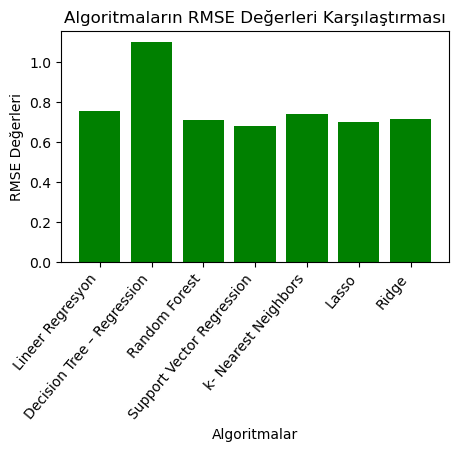

In [50]:
algoritma_isimleri = ['Lineer Regresyon', 'Decision Tree – Regression', 'Random Forest', 'Support Vector Regression', 'k- Nearest Neighbors', 'Lasso', 'Ridge']
rmse_degerleri = [rmse_linear, rmse_dt, rmse_rf, rmse_svr, rmse_knn, rmse_lasso, rmse_ridge]

# RMSE değerlerini bar grafik olarak çizdirme
plt.figure(figsize=(5, 3))
plt.bar(algoritma_isimleri, rmse_degerleri, color='green')
plt.xlabel('Algoritmalar')
plt.ylabel('RMSE Değerleri')
plt.title('Algoritmaların RMSE Değerleri Karşılaştırması')
plt.xticks(rotation=50, ha='right')
plt.show()

In [51]:
import pickle
pickle.dump(svr_reg,open('model.pkl','wb'))

In [63]:
mahalle_df = pd.DataFrame(df.MAHALLE.unique(), columns=['MAHALLE'])

In [64]:
mahalle_df

MAHALLE
0         İmbatlı  
1       Mavişehir  
2        Goncalar  
3        Bostanlı  
4        Şemikler  
5           Aksoy  
6    Bahriye Üçok  
7       Donanmacı  
8      Demirköprü  
9           İnönü  
10   Bahçelievler  
11           Yalı  
12       Örnekköy  
13        Atakent  
14        Alaybey  
15         Nergiz  
16    Fikri Altay  
17        Tersane  
18  Mustafa Kemal  
19       Dedebaşı  
20           Tuna  
21       Bahariye  
22  Zübeyde Hanım  
23   Latife Hanım  
24     Cumhuriyet

In [65]:
mahalle_df.to_excel("mahalle_data.xlsx", index=False)